In [2]:
# --------------------------------------------------------------
# 🧠 CODTECH TASK 2 – Predictive Analysis using Machine Learning
# Dataset: Mall_Customers.csv
# Company: Codetech IT Solutions | Domain: Data Analytics
# --------------------------------------------------------------

# Step 1️⃣ - Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2️⃣ - Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Basic info
df.info()

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


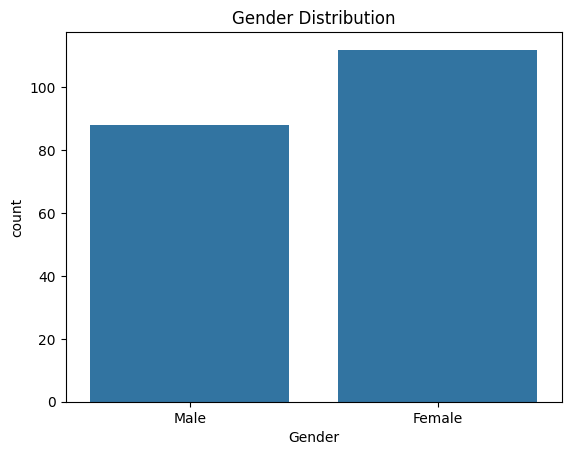

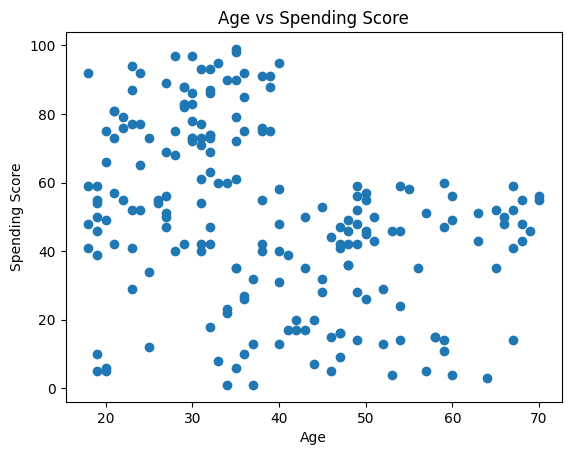

In [4]:
# Gender distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

# Age vs Spending Score
plt.scatter(df["Age"], df["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Score")
plt.show()



In [5]:
# Create new target column
df["Spender_Type"] = df["Spending Score (1-100)"].apply(lambda x: 1 if x >= 50 else 0)

# Encode Gender
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Select features and target
X = df[["Gender", "Age", "Annual Income (k$)"]]
y = df["Spender_Type"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [6]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


✅ Accuracy: 72.0 %

Confusion Matrix:
 [[16  7]
 [ 7 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        23
           1       0.74      0.74      0.74        27

    accuracy                           0.72        50
   macro avg       0.72      0.72      0.72        50
weighted avg       0.72      0.72      0.72        50



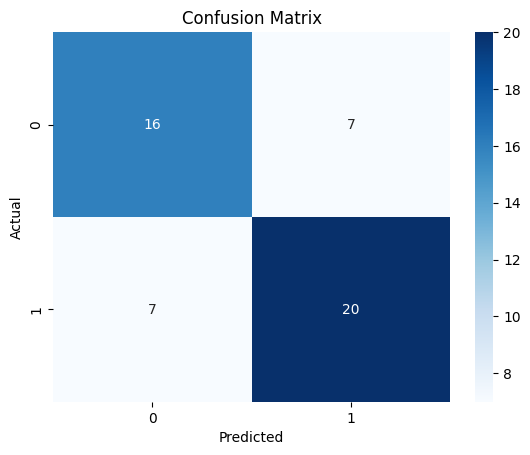

In [7]:
# Evaluate
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("✅ Accuracy:", round(acc * 100, 2), "%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

# Visualize Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Example insight
print("\n🔹 Higher income and younger age groups are more likely to be high spenders.")


Model Coefficients: [[ 0.01745397 -0.47233822 -0.00943345]]
Model Intercept: [-0.00263153]

🔹 Higher income and younger age groups are more likely to be high spenders.


In [9]:
import joblib
joblib.dump(model, "mall_customer_spender_model.pkl")
print("Model saved successfully!")


Model saved successfully!
